# Задача динамического рассеяния света (DLS)

В DLS, PSD можно перевернуть от нормализованного ACF электрического поля
$$
g(\tau) = \int_{0}^{\infty} G(\Gamma)\exp(-\Gamma\tau)d\Gamma    (1)
$$
в котором G-ширина линии распада, τ-время задержки, а $G(\Gamma)$- нормализованная функция распределения линии распада. $G(\Gamma)$ содержит информацию PSD и удовлетворяет условиям $\int_{0}^{\infty}G(\Gamma)d\Gamma = 1$. Согласно следующим трем формулам, PSD может быть решена из некорректного уравнения (1).

$$
\Gamma = Dq^2 
$$

$$
q = \frac{4\pi l}{\lambda}\sin(\frac{\theta}{2})
$$

$$
D = \frac{kbT}{3\pi\eta d}
$$

в котором q-рассеянный вектор, D-коэффициент диффузии, l-длина волны падающего света в вакуум, q-угол рассеяния, l-показатель преломления раствора, T-абсолютная температура, kb - постоянная Больцмана, d-диаметр частицы, а $\eta$ -вязкость раствора

Решение задачи динамического рассеяния света (DLS) позволяет определять размеры частиц в растворе по спектру интенсивности рассеяного света. Если растворе представлен один сорт частиц, то спектр итенсивности для нее определяется кривой Лоренца:
$$
I(f) = \frac{A}{\pi} \frac{\Gamma}{(2\pi f)^2 + \Gamma^2}
$$
Здесь $f$ - частота, $\Gamma$ - характеристика частицы, обратно пропорциональная ее диаметру.

Для раствора, содержащего $n$ частиц, спектр интенсивности есть сумма Лоренцов для каждой отдельной частицы, взятых с определенным весом, пропорциональным их концентрации:
$$
I(f) = \frac{1}{\pi} \sum_{i=1}^n\frac{A(\Gamma_i)\Gamma_i}{(2\pi f)^2 + \Gamma_i^2}
$$

В результате эксперимента методом DLS получается кривая интенсивности рассеяния, по которой необходимо определить частицы каких размеров представлены в растворе. Предполагая, что 

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as sklm
import scipy




# основные константы. В этой части определяется все, что связано с постановкой эксперимента
kb = 1.38064e-23 # постоянная Больцмана
T = 273.15 + 22 # температура в K
theta = np.pi/2 # угол рассеяния
n = 1.333 # показатель преломления
eta = 0.958e-3 # Н * с/м^2 - динамическая вязкость воды
l = 650e-9 # Длина волны лазера

# далее задаем коэффициент, связывающий характеричтику Gamma с размером частицы
coeff = (kb * T/(3 * np.pi * eta)) * (4 * np.pi * n / l)**2 * np.sin(theta/2)**2
d1 = 200e-9
G1 = coeff / d1 # Gamma для частицы размером 200 нм
d2 = 100e-9
G2 = coeff / d2

# определяем кривые Лоренца для частиц
w = 2.0*np.arange(1,5001)
y1 = G1 / ((2 * np.pi * w)**2 + G1**2)
y2 = G2 / ((2 * np.pi * w)**2 + G2**2)
y = y1 + y2
#y = y1


t = np.linspace(0.001, 0.02, 5000)
# r = np.linspace(1e-7, 1e-5, 5000)
r = 1e-6
new_coeff = (kb * T/(6 * np.pi * eta))
G3 = new_coeff / d1
P = np.exp(-1 * r**2 / (4 * t * G3)) * (4 * np.pi * G3 * t)**(-3/2)

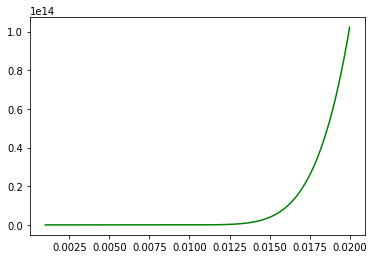

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

# кривая Лоренца
# plt.plot(w, y1, 'red')
# plt.plot(w, y2, 'blue')
# plt.plot(w, y, 'green')
plt.plot(t, P, 'green')

[4.66688165e+16+0.00000000e+00j 3.78623388e+16+1.95576565e+16j
 2.21091326e+16+2.53607770e+16j ... 1.18027938e+16-2.23451833e+16j
 2.21091326e+16-2.53607770e+16j 3.78623388e+16-1.95576565e+16j]


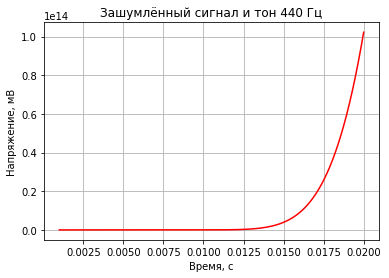

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


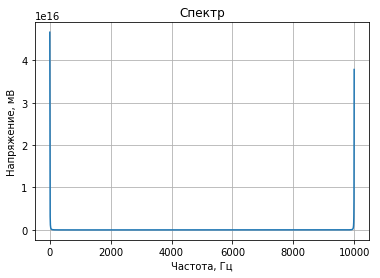

In [10]:
# from numpy.fft import rfft, rfftfreq

# spectrum = rfft(P)

# # yf = scipy.fftpack.fft(P)
# # print(yf)
# plt.plot(w, spectrum, 'green')

from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq, fft, ifft, irfft
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt

#import scipy.fftpack

FD = 20000 # частота дискретизации, отсчётов в секунду

N = 5000 # длина входного массива, 0.091 секунд при такой частоте дискретизации
# сгенерируем сигнал с частотой 440 Гц длиной N
pure_sig = np.exp(-1 * r**2 / (4 * t * G3)) * (4 * np.pi * G3 * t)**(-3/2)
# pure_sig = array([ np.exp(-1 * r**2 / (4 * t * G3)) * (4 * np.pi * G3 * t)**(-3/2) for t in range(1, N+1) ])
# сгенерируем шум, тоже длиной N (это важно!)
noise = 0#uniform(-50.,50., N)
sig = pure_sig + noise
# вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft
spectrum = fft(sig)

#spectrum = scipy.fftpack.fft(sig)

print(spectrum)
# нарисуем всё это, используя matplotlib
# Сначала сигнал зашумлённый и тон отдельно
# plt.plot(arange(N)/float(FD), sig) # по оси времени секунды!
plt.plot(t, pure_sig, 'r') # чистый сигнал будет нарисован красным
plt.xlabel(u'Время, c')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Зашумлённый сигнал и тон 440 Гц')
plt.grid(True)
plt.show()
# когда закроется этот график, откроется следующий
# Потом спектр
plt.plot(w, spectrum)
# plt.plot(rfftfreq(N, 1./FD), np_abs(spectrum)/N)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в герцы
# нас интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы амплитуды были в милливольтах, а не в суммах Фурье. Проверить просто — постоянные составляющие должны совпадать в сгенерированном сигнале и в спектре
plt.xlabel(u'Частота, Гц')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

In [11]:
# диапазон размеров частиц, где ищем нужный размер 
d_min = 1e-9 # 1 нм
d_max = 1e-6 

# задаем сетку по Gamma
G_min = coeff/d_max
G_max = coeff/d_min
N = 256*8 # Число узлов в сетке по \Gamma
M = w.size # Число точек по частоте
p = (G_max/G_min)**(1/(N-1))
G = np.zeros(N)

# неравнмерная сетка со сгущением к нулю (так как больщий вклад в интенсивность дают крупные частицы)
# хотя такая сетка - это не единственно возможный вариант
for j in range(N):
    G[j] = G_min * (p**j)

# вот равномерная сетка
#G = np.linspace(G_min, G_max, N)    

A = np.zeros((M,N))

# Матрица коэффициентов (составляется по базисным ф-ям)
for i in range(M):
    for j in range(N):
        A[i,j] = G[j] / ((2 * np.pi * w[i])**2 + G[j]**2)  

# Использование методов

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1.0, 1000.0)

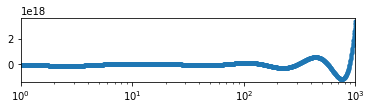

In [12]:
# Ridge regression
y = spectrum

clf = sklm.Ridge(alpha = 5e-7)
clf.fit(A, y)
a1 = clf.coef_

# alpha = 1.3e-7
# B = np.zeros((M+N, N))
# B[0:M,:] = A
# B[M::, :] = alpha * np.eye(N)
# y_ = np.zeros(M+N)
# y_[0:M] = y
# a1, rnorm = scipy.optimize.nnls(B,y_)

fig = plt.figure()
ax = plt.subplot(3,1,1)
line, = plt.plot(1e+9 * coeff/G, a1,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)